In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import *

rcParams['figure.figsize'] = 10, 10

font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 14}

matplotlib.rc('font', **font)

/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
auc_file = './files_MS_aug_bgrn1/auc_bgrn1_ms_aug_ep500_step16000_b32.txt'
ep_loss_file = './files_MS_aug_bgrn1/losses_ep_bgrn1_ms_aug_ep500_step16000_b32.txt'
loss_file = './files_MS_aug_bgrn1/loss_bgrn1_ms_aug_ep500_step16000_b32.txt'

auc = np.loadtxt(auc_file)
ep_loss = np.loadtxt(ep_loss_file)
loss = np.loadtxt(loss_file)

auc.shape, ep_loss.shape, loss.shape

((500,), (1000,), (4000,))

/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


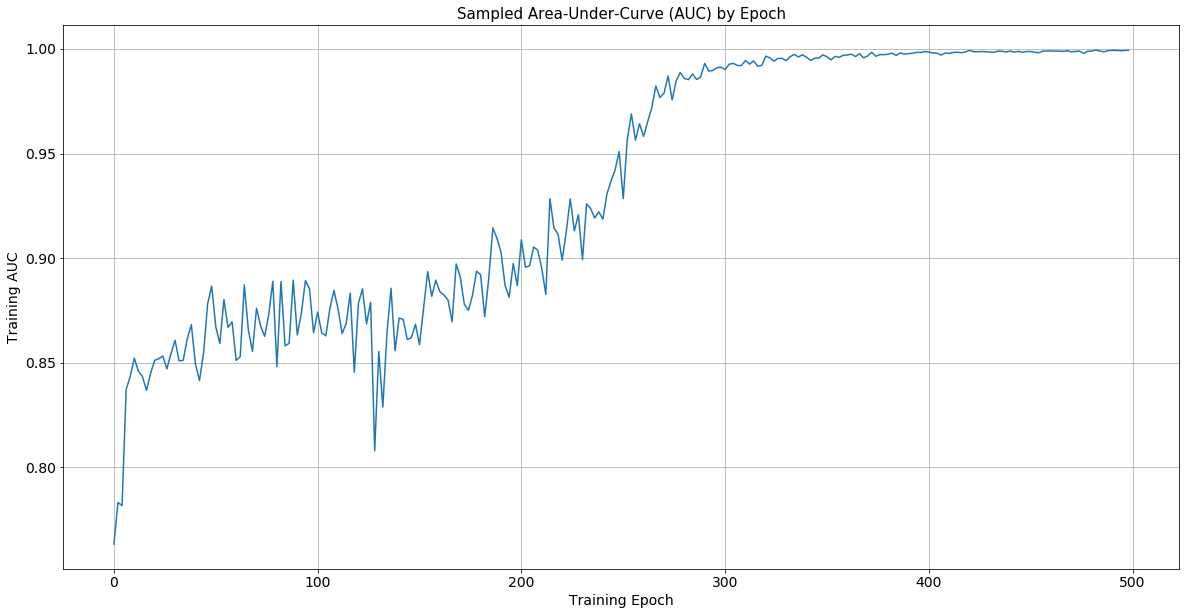

In [3]:
plot_data = auc[::2]
xvals = np.arange(plot_data.shape[0])*2

plt.figure(figsize=(20,10))
plt.plot(xvals, plot_data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sampled Area-Under-Curve (AUC) by Epoch', fontsize=15)
plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Training AUC', fontsize=14)
plt.grid(True)
plt.show()

/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


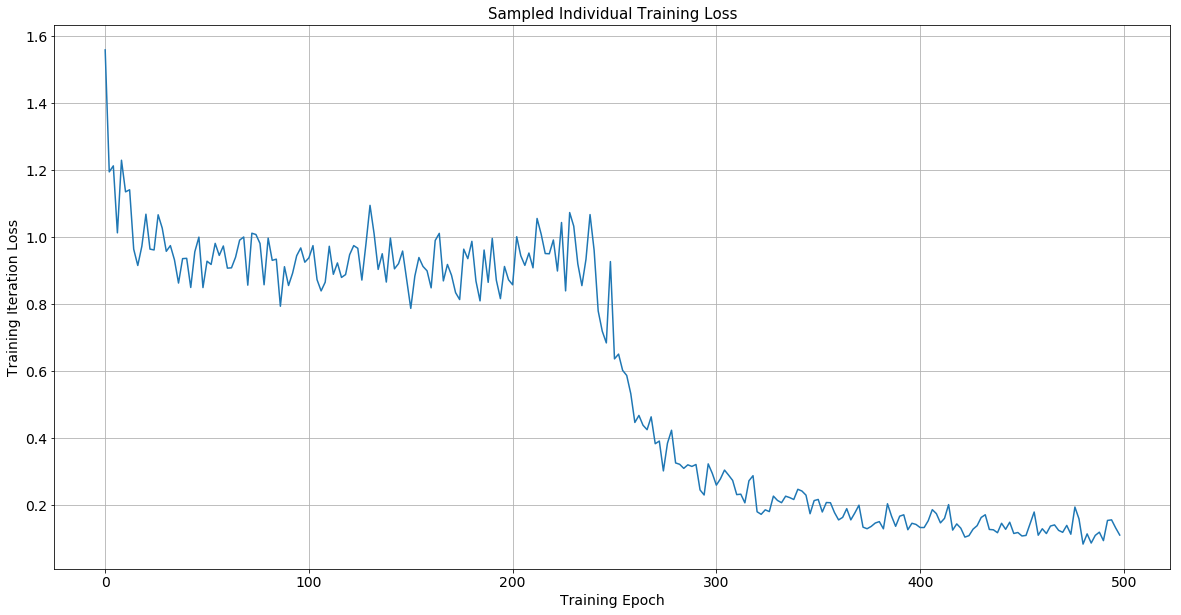

In [4]:
plot_data = loss[::16]
xvals = np.arange(plot_data.shape[0])*2

plt.figure(figsize=(20,10))
plt.plot(xvals, plot_data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sampled Individual Training Loss', fontsize=15)
plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Training Iteration Loss', fontsize=14)
plt.grid(True)
plt.show()

/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


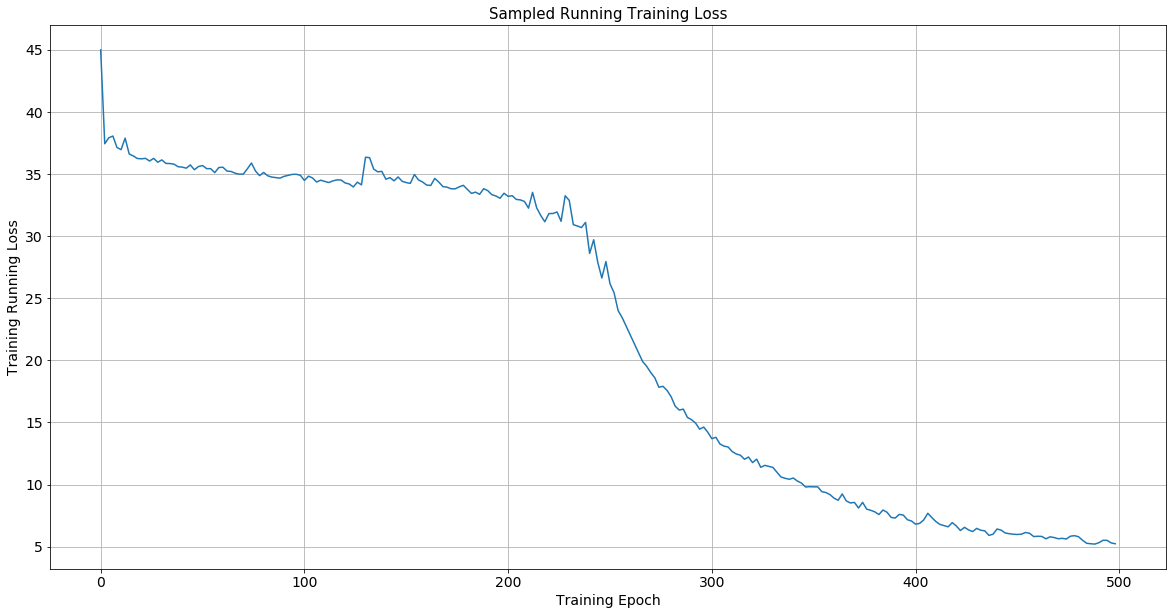

In [5]:
plot_data = ep_loss[::4]
xvals = np.arange(plot_data.shape[0])*2

plt.figure(figsize=(20,10))
plt.plot(xvals, plot_data)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sampled Running Training Loss', fontsize=15)
plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Training Running Loss', fontsize=14)
plt.grid(True)
plt.show()

/home/ubuntu/anaconda3/envs/spatial_torch/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


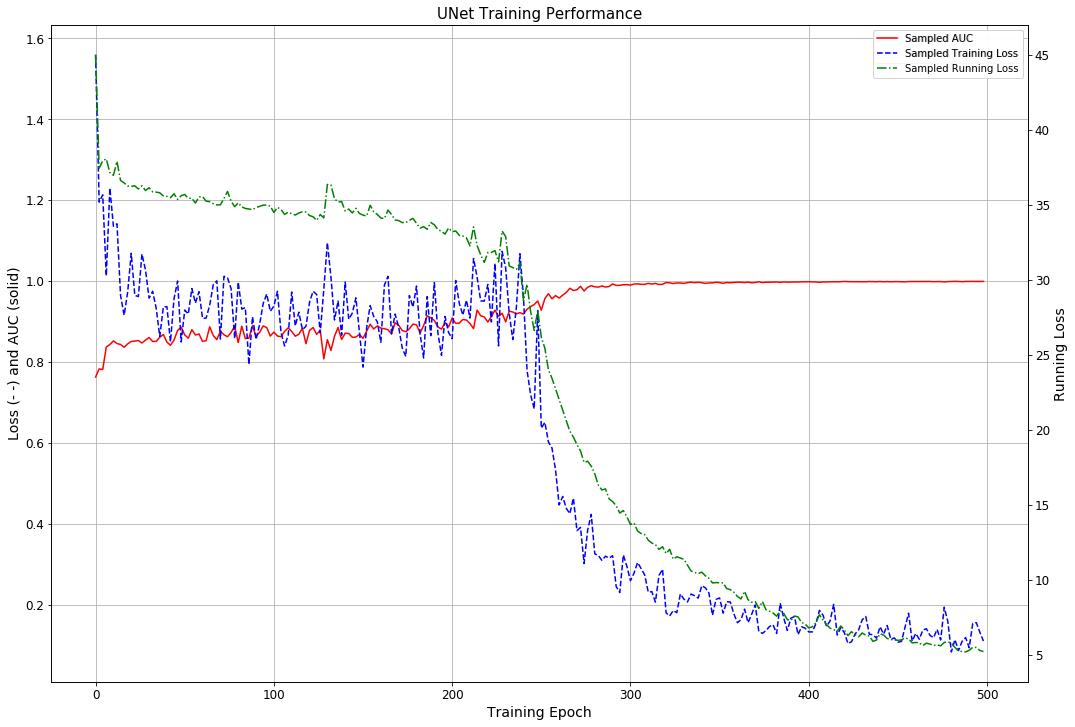

In [17]:
runloss_plot_data = ep_loss[::4]
xvals = np.arange(plot_data.shape[0])*2

loss_plot_data = loss[::16]
auc_plot_data = auc[::2]

fig, ax1 = plt.subplots(figsize=(15,10))
ax1.set_xlabel('Training Epoch', fontsize=14)
ax1.set_ylabel('Loss (- -) and AUC (solid)', fontsize=14)
ln_auc = ax1.plot(xvals, auc_plot_data, 'r', label='Sampled AUC')
ln_loss = ax1.plot(xvals, loss_plot_data, '--b', label='Sampled Training Loss')
ax1.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Running Loss', fontsize=14)  # we already handled the x-label with ax1
ln_runloss = ax2.plot(xvals, runloss_plot_data, '-.g', label='Sampled Running Loss')


# added these three lines
# lns = ln_auc + ln_loss + ln_runloss
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=0)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('UNet Training Performance', fontsize=15)

plt.show()